# 1. 데이터 로딩

In [1]:
import pandas as pd
import numpy as np

# GitHub의 'raw' CSV 파일 URL 사용
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"

# CSV 파일 불러오기
df = pd.read_csv(url)

# 데이터프레임 확인
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 2. 결측치 확인

In [3]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

             결측치 개수  결측치 비율(%)
PassengerId       0   0.000000
Survived          0   0.000000
Pclass            0   0.000000
Name              0   0.000000
Sex               0   0.000000
Age             177  19.865320
SibSp             0   0.000000
Parch             0   0.000000
Ticket            0   0.000000
Fare              0   0.000000
Cabin           687  77.104377
Embarked          2   0.224467


### 결측치 확인 결과 

##### Age(나이)에서 약 19.9% 비율 
##### Cabin(객실번호)에서 약 77.1% 비율
##### Embarked(승선한 항구)에서 약 0.2% 비율

##### Age(나이)의 결측치는 평균 나이로 채우고, Cabin(객실번호)와 Embarked(승선한 항구)는 컬럼 제거

# 3. 결측치 제거

#### Age(나이) 결측치 제거 (평균나이로 대체)

In [21]:
# 결측치 개수 확인 (적용 전)
print("결측치 개수(적용 전):", df["Age"].isnull().sum())

# 평균 나이 계산
mean_age = df["Age"].mean()

# 결측치를 평균 나이로 채우기 
df["Age"] = df["Age"].fillna(mean_age)  

# 결측치 개수 확인 (적용 후)
print("결측치 개수(적용 후):", df["Age"].isnull().sum())

# 평균 나이 출력
print(f"평균 나이로 채움: {mean_age:.2f}")

print(df["Age"])

결측치 개수(적용 전): 177
결측치 개수(적용 후): 0
평균 나이로 채움: 29.70
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


#### Cabin(객실번호)와 Embarked(승선한 항구) 컬럼 제거는 5 단계에서 진행

# 4. 레이블 확인

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


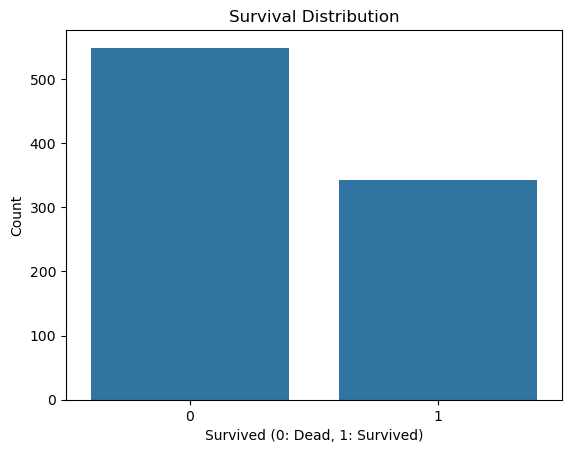

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
df = pd.read_csv(url)

# 2. 레이블 분포 확인
print(df["Survived"].value_counts())  # 클래스 개수 출력
print(df["Survived"].value_counts(normalize=True) * 100)  # 비율(%) 출력

# 3. 시각화
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived (0: Dead, 1: Survived)")
plt.ylabel("Count")
plt.show()

# 5. 불필요한 컬럼 제거

#### Name(이름), Ticket(티켓), Cabin(객실번호), Embarked(승선한 항구) 컬럼 제거

In [45]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [16]:
# 삭제할 칼럼 지정 ('Cabin', 'Name', 'Ticket', 'Embarked' 삭제)
columns_to_drop = ["Name", "Ticket", "Cabin", "Embarked"]
df.drop(columns=columns_to_drop, inplace=True)

# 변경된 데이터프레임 확인
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500


# 6. 인코딩

#### 성별을 숫자로 바꿈( Male → 0, Female → 1 )

In [19]:
# 성별 인코딩 (Male → 0, Female → 1)
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})

print(df.head())

print(df["Age"])

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


# DT

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500


In [27]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["Survived"])  # 'Survived' 컬럼 제외 (입력 데이터)
y = df["Survived"]  # 'Survived' 컬럼만 저장 (타깃 데이터)

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1       3    0  22.0      1      0   7.2500
1            2       1    1  38.0      1      0  71.2833
2            3       3    1  26.0      0      0   7.9250
3            4       1    1  35.0      1      0  53.1000
4            5       3    0  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [31]:
# DT 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측 수행
pred_dt = dt_model.predict(X_test)

In [158]:
print("\n📌 [1] 예측값 vs 실제값 비교")
result_df = pd.DataFrame({'실제값': y_test.values, '예측값': pred_dt})
print(result_df)

print("\n📌 [2] accuracy 출력")
accuracy = accuracy_score(y_test, pred_dt)
print(f"DT 정확도: {accuracy:.4f}")

print("\n📌 [3] confusion matrix 출력") 
print(confusion_matrix(y_test, pred_dt))



📌 [1] 예측값 vs 실제값 비교
     실제값  예측값
0      0    0
1      0    0
2      0    0
3      1    1
4      1    1
..   ...  ...
218    0    0
219    1    1
220    0    0
221    1    1
222    1    0

[223 rows x 2 columns]

📌 [2] accuracy 출력
모델 정확도: 0.7668

📌 [3] confusion matrix 출력
[[112  27]
 [ 25  59]]


# RF

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [163]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["Survived"])  # 'Survived' 컬럼 제외 (입력 데이터)
y = df["Survived"]  # 'Survived' 컬럼만 저장 (타깃 데이터)

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1       3    0  22.0      1      0   7.2500
1            2       1    1  38.0      1      0  71.2833
2            3       3    1  26.0      0      0   7.9250
3            4       1    1  35.0      1      0  53.1000
4            5       3    0  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [167]:
# 4. 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. 예측 수행
pred_rf = rf_model.predict(X_test)

In [169]:
# 6. 결과 출력
print("\n📌 [1] 예측값 vs 실제값 비교")
result_rf = pd.DataFrame({'실제값': y_test.values, '예측값': pred_rf})
print(result_rf)

print("\n📌 [2] 정확도 출력")
accuracy = accuracy_score(y_test, pred_rf)
print(f"RF 정확도: {accuracy:.4f}")

print("\n📌 [3] confusion matrix 출력") 
print(confusion_matrix(y_test, pred_rf))


📌 [1] 예측값 vs 실제값 비교
     실제값  예측값
0      0    0
1      0    0
2      0    0
3      1    1
4      1    1
..   ...  ...
218    0    0
219    1    1
220    0    0
221    1    1
222    1    1

[223 rows x 2 columns]

📌 [2] 정확도 출력
랜덤 포레스트 정확도: 0.8341

📌 [3] confusion matrix 출력
[[124  15]
 [ 22  62]]


# SVM

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["Survived"])  # 'Survived' 컬럼 제외 (입력 데이터)
y = df["Survived"]  # 'Survived' 컬럼만 저장 (타깃 데이터)

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1       3    0  22.0      1      0   7.2500
1            2       1    1  38.0      1      0  71.2833
2            3       3    1  26.0      0      0   7.9250
3            4       1    1  35.0      1      0  53.1000
4            5       3    0  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [178]:
# 1. SVM 모델 생성 및 학습
svm_model = SVC(kernel="linear", random_state=42)  # 선형 커널 사용
svm_model.fit(X_train, y_train)

# 2. 예측
y_pred_svm = svm_model.predict(X_test)

In [180]:
# 6. 결과 출력
print("\n📌 [1] 예측값 vs 실제값 비교")
result_svm = pd.DataFrame({'실제값': y_test.values, '예측값': y_pred_svm})
print(result_svm)

print("\n📌 [2] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM 정확도: {accuracy:.4f}")

print("\n📌 [3] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_svm))


📌 [1] 예측값 vs 실제값 비교
     실제값  예측값
0      0    0
1      0    0
2      0    0
3      1    1
4      1    1
..   ...  ...
218    0    1
219    1    1
220    0    0
221    1    1
222    1    1

[223 rows x 2 columns]

📌 [2] 정확도 출력
랜덤 포레스트 정확도: 0.7803

📌 [3] confusion matrix 출력
[[115  24]
 [ 25  59]]


# LR

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [185]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["Survived"])  # 'Survived' 컬럼 제외 (입력 데이터)
y = df["Survived"]  # 'Survived' 컬럼만 저장 (타깃 데이터)

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1       3    0  22.0      1      0   7.2500
1            2       1    1  38.0      1      0  71.2833
2            3       3    1  26.0      0      0   7.9250
3            4       1    1  35.0      1      0  53.1000
4            5       3    0  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [194]:
# 4. 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# 5. 예측 수행
y_pred_lr = lr_model.predict(X_test)

In [196]:
# 6. 결과 출력
print("\n📌 [1] 예측값 vs 실제값 비교")
result_lr = pd.DataFrame({'실제값': y_test.values, '예측값': y_pred_lr})
print(result_lr)

print("\n📌 [2] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LR 정확도: {accuracy:.4f}")

print("\n📌 [3] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_lr))


📌 [1] 예측값 vs 실제값 비교
     실제값  예측값
0      0    0
1      0    0
2      0    0
3      1    1
4      1    1
..   ...  ...
218    0    0
219    1    1
220    0    0
221    1    1
222    1    1

[223 rows x 2 columns]

📌 [2] 정확도 출력
LR 정확도: 0.7982

📌 [3] confusion matrix 출력
[[119  20]
 [ 25  59]]


# KNN

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["Survived"])  # 'Survived' 컬럼 제외 (입력 데이터)
y = df["Survived"]  # 'Survived' 컬럼만 저장 (타깃 데이터)

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1       3    0  22.0      1      0   7.2500
1            2       1    1  38.0      1      0  71.2833
2            3       3    1  26.0      0      0   7.9250
3            4       1    1  35.0      1      0  53.1000
4            5       3    0  35.0      0      0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [40]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 생성 및 학습 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)


KNN 모델 정확도: 0.7937


In [42]:
print("\n📌 [1] 예측값 vs 실제값 비교")
result_knn = pd.DataFrame({'실제값': y_test.values, '예측값': y_pred_knn})
print(result_knn)

print("\n📌 [2] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN 정확도: {accuracy:.4f}")

print("\n📌 [3] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_knn))


📌 [1] 예측값 vs 실제값 비교
     실제값  예측값
0      0    0
1      0    0
2      0    0
3      1    1
4      1    1
..   ...  ...
218    0    0
219    1    1
220    0    0
221    1    1
222    1    0

[223 rows x 2 columns]

📌 [2] 정확도 출력
KNN 정확도: 0.7937

📌 [3] confusion matrix 출력
[[117  22]
 [ 24  60]]
